#1. Setup
- Load Libraries: Load all necessary R libraries such as tidyverse, lubridate, ggplot2.

In [1]:
# Load necessary libraries
library(tidyverse)   # For data manipulation and visualization
library(lubridate)   # For handling date and time data
library(ggplot2)     # For creating visualizations
library(tidyr)       # For pivoting

# Set global options
options(stringsAsFactors = FALSE)  # Prevents automatic conversion to factors in data frames


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


#2. Data Import
- Read Data: Load data from CSV files or other sources into data frames.

In [2]:
# Read in incidents dataset
incidents <- read_csv("/content/downsample_police-department-incidents.csv")

# Read in calls dataset
calls <- read_csv("/content/downsample_police-department-calls-for-service.csv")

# Print confirmation that files are loaded
print('Datasets loaded successfully!')

# Display the first few rows of each dataset to ensure correct loading
print("First few rows of the Incidents dataset:")
head(incidents)

print("First few rows of the Calls dataset:")
head(calls)


Rows: 84000 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): Category, Descript, DayOfWeek, PdDistrict, Resolution, Address, Lo...
dbl  (4): IncidntNum, X, Y, PdId
dttm (1): Date
time (1): Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 100000 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): Descript, Disposition, Address, City, State, Address Type, Common ...
dbl  (2): Crime Id, Agency Id
dttm (4): Report Date, Date, Offense Date, Call Date Time
time (1): Call Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Datasets loaded successfully!"
[1] "First few rows of the Incidents dataset:"


IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
<dbl>,<chr>,<chr>,<chr>,<dttm>,<time>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
176122807,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Saturday,2017-05-13,10:20:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.4034,37.77542,"{'latitude': '37.775420706711', 'human_address': '{""address"":"""",""city"":"""",""state"":"""",""zip"":""""}', 'needs_recoding': False, 'longitude': '-122.40340479147905'}",1.761228e+13
160569314,ASSAULT,BATTERY,Thursday,2016-07-14,16:00:00,MISSION,NONE,MISSION ST / CESAR CHAVEZ ST,-122.4182,37.74817,"{'latitude': '37.748166408398525', 'human_address': '{""address"":"""",""city"":"""",""state"":"""",""zip"":""""}', 'needs_recoding': False, 'longitude': '-122.41822194622897'}",1.605693e+13
160362475,ROBBERY,"ROBBERY, BODILY FORCE",Tuesday,2016-05-03,14:19:00,NORTHERN,"ARREST, BOOKED",700 Block of WEBSTER ST,-122.4299,37.77744,"{'latitude': '37.777443147510695', 'human_address': '{""address"":"""",""city"":"""",""state"":"""",""zip"":""""}', 'needs_recoding': False, 'longitude': '-122.42991867757686'}",1.603625e+13
160435298,KIDNAPPING,"KIDNAPPING, ADULT VICTIM",Friday,2016-05-27,23:57:00,SOUTHERN,"ARREST, BOOKED",0 Block of 4TH ST,-122.4050,37.78512,"{'latitude': '37.78511785639532', 'human_address': '{""address"":"""",""city"":"""",""state"":"""",""zip"":""""}', 'needs_recoding': False, 'longitude': '-122.40495695637503'}",1.604353e+13
90543656,MISSING PERSON,MISSING JUVENILE,Tuesday,2009-05-26,07:40:00,TARAVAL,LOCATED,0 Block of JULES AV,-122.4612,37.71912,"{'latitude': '37.7191248815986', 'human_address': '{""address"":"""",""city"":"""",""state"":"""",""zip"":""""}', 'needs_recoding': False, 'longitude': '-122.461163238283'}",9.054366e+12
180018692,VEHICLE THEFT,STOLEN MOTORCYCLE,Sunday,2018-01-07,18:00:00,CENTRAL,NONE,NORTHPOINT ST / JONES ST,-122.4171,37.80614,"{'latitude': '37.80614208538619', 'human_address': '{""address"":"""",""city"":"""",""state"":"""",""zip"":""""}', 'needs_recoding': False, 'longitude': '-122.41708175321843'}",1.800187e+13


[1] "First few rows of the Calls dataset:"


Crime Id,Descript,Report Date,Date,Offense Date,Call Time,Call Date Time,Disposition,Address,City,State,Agency Id,Address Type,Common Location
<dbl>,<chr>,<dttm>,<dttm>,<dttm>,<time>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
163003307,Bicyclist,2016-10-26,2016-10-26,2016-10-26,17:47:00,2016-10-26 17:47:00,GOA,The Embarcadero Nor/kearny St,San Francisco,CA,1,Intersection,NA
180870423,586,2018-03-28,2018-03-28,2018-03-28,05:49:00,2018-03-28 05:49:00,HAN,Ingalls St/van Dyke Av,San Francisco,CA,1,Intersection,NA
173510362,Suspicious Person,2017-12-17,2017-12-17,2017-12-17,03:00:00,2017-12-17 03:00:00,ADV,Howard St/4th St,San Francisco,CA,1,Intersection,NA
163272811,911 Drop,2016-11-22,2016-11-22,2016-11-22,17:39:00,2016-11-22 17:39:00,NOM,400 Block Of Sutter St,San Francisco,CA,1,Premise Address,NA
172811002,Drugs,2017-10-08,2017-10-08,2017-10-08,08:54:00,2017-10-08 08:54:00,GOA,400 Block Of Leavenworth St,San Francisco,CA,1,Premise Address,NA
181623124,Suspicious Vehicle,2018-06-11,2018-06-11,2018-06-11,19:08:00,2018-06-11 19:08:00,ADV,Jerrold Av/milton I Ross St,San Francisco,CA,1,Intersection,NA


In [3]:
# Get a quick summary of each dataset to understand the structure and types of data contained
print("Structure and summary of the Incidents dataset:")
glimpse(incidents)
summary(incidents)

print("Structure and summary of the Calls dataset:")
glimpse(calls)
summary(calls)


[1] "Structure and summary of the Incidents dataset:"
Rows: 84,000
Columns: 13
$ IncidntNum <dbl> 176122807, 160569314, 160362475, 160435298, 90543656, 18001…
$ Category   <chr> "LARCENY/THEFT", "ASSAULT", "ROBBERY", "KIDNAPPING", "MISSI…
$ Descript   <chr> "GRAND THEFT FROM UNLOCKED AUTO", "BATTERY", "ROBBERY, BODI…
$ DayOfWeek  <chr> "Saturday", "Thursday", "Tuesday", "Friday", "Tuesday", "Su…
$ Date       <dttm> 2017-05-13, 2016-07-14, 2016-05-03, 2016-05-27, 2009-05-26…
$ Time       <time> 10:20:00, 16:00:00, 14:19:00, 23:57:00, 07:40:00, 18:00:00…
$ PdDistrict <chr> "SOUTHERN", "MISSION", "NORTHERN", "SOUTHERN", "TARAVAL", "…
$ Resolution <chr> "NONE", "NONE", "ARREST, BOOKED", "ARREST, BOOKED", "LOCATE…
$ Address    <chr> "800 Block of BRYANT ST", "MISSION ST / CESAR CHAVEZ ST", "…
$ X          <dbl> -122.4034, -122.4182, -122.4299, -122.4050, -122.4612, -122…
$ Y          <dbl> 37.77542, 37.74817, 37.77744, 37.78512, 37.71912, 37.80614,…
$ Location   <chr> "{'latitude': '37.7754

   IncidntNum          Category           Descript          DayOfWeek        
 Min.   :  1120489   Length:84000       Length:84000       Length:84000      
 1st Qu.:160292490   Class :character   Class :character   Class :character  
 Median :166262250   Mode  :character   Mode  :character   Mode  :character  
 Mean   :151134829                                                           
 3rd Qu.:170866229                                                           
 Max.   :991008997                                                           
      Date                            Time           PdDistrict       
 Min.   :2003-01-01 00:00:00.00   Length:84000      Length:84000      
 1st Qu.:2016-04-06 00:00:00.00   Class1:hms        Class :character  
 Median :2016-12-16 00:00:00.00   Class2:difftime   Mode  :character  
 Mean   :2015-06-11 17:55:38.74   Mode  :numeric                      
 3rd Qu.:2017-08-18 00:00:00.00                                       
 Max.   :2018-05-15 00:00:00

[1] "Structure and summary of the Calls dataset:"
Rows: 100,000
Columns: 14
$ `Crime Id`        <dbl> 163003307, 180870423, 173510362, 163272811, 17281100…
$ Descript          <chr> "Bicyclist", "586", "Suspicious Person", "911 Drop",…
$ `Report Date`     <dttm> 2016-10-26, 2018-03-28, 2017-12-17, 2016-11-22, 201…
$ Date              <dttm> 2016-10-26, 2018-03-28, 2017-12-17, 2016-11-22, 201…
$ `Offense Date`    <dttm> 2016-10-26, 2018-03-28, 2017-12-17, 2016-11-22, 201…
$ `Call Time`       <time> 17:47:00, 05:49:00, 03:00:00, 17:39:00, 08:54:00, 1…
$ `Call Date Time`  <dttm> 2016-10-26 17:47:00, 2018-03-28 05:49:00, 2017-12-1…
$ Disposition       <chr> "GOA", "HAN", "ADV", "NOM", "GOA", "ADV", "REP", "GO…
$ Address           <chr> "The Embarcadero Nor/kearny St", "Ingalls St/van Dyk…
$ City              <chr> "San Francisco", "San Francisco", "San Francisco", "…
$ State             <chr> "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA"…
$ `Agency Id`       <dbl> 1, 1, 1, 1, 1, 1, 

    Crime Id           Descript          Report Date                    
 Min.   :160912801   Length:100000      Min.   :2016-03-31 00:00:00.00  
 1st Qu.:162913120   Class :character   1st Qu.:2016-10-17 00:00:00.00  
 Median :171330781   Mode  :character   Median :2017-05-13 00:00:00.00  
 Mean   :170556033                      Mean   :2017-05-15 13:10:56.05  
 3rd Qu.:173352906                      3rd Qu.:2017-12-01 00:00:00.00  
 Max.   :183063946                      Max.   :2018-11-02 00:00:00.00  
 NA's   :77                                                             
      Date                         Offense Date                   
 Min.   :2016-03-31 00:00:00.00   Min.   :2016-03-31 00:00:00.00  
 1st Qu.:2016-10-17 00:00:00.00   1st Qu.:2016-10-17 00:00:00.00  
 Median :2017-05-13 00:00:00.00   Median :2017-05-13 00:00:00.00  
 Mean   :2017-05-15 13:10:56.05   Mean   :2017-05-15 13:10:56.05  
 3rd Qu.:2017-12-01 00:00:00.00   3rd Qu.:2017-12-01 00:00:00.00  
 Max.   :2018-

#3. Data Cleaning
- Clean Data: Address missing values, incorrect data types, and any anomalies found in the datasets.

In [4]:
# Inspect missing values in both datasets
sum(is.na(incidents))
sum(is.na(calls))


[1] 0

[1] 92966

In [5]:
# Convert 'Date' columns to Date type
incidents$Date <- as.Date(incidents$Date)
calls$Date <- as.Date(calls$Date)

# Convert categorical variables to factors
incidents$Category <- as.factor(incidents$Category)
calls$Disposition <- as.factor(calls$Disposition)


In [6]:
# Check the structure and data types of each column in both datasets
str(incidents)
str(calls)


spc_tbl_ [84,000 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ IncidntNum: num [1:84000] 1.76e+08 1.61e+08 1.60e+08 1.60e+08 9.05e+07 ...
 $ Category  : Factor w/ 38 levels "ARSON","ASSAULT",..: 17 2 26 16 20 36 17 22 20 21 ...
 $ Descript  : chr [1:84000] "GRAND THEFT FROM UNLOCKED AUTO" "BATTERY" "ROBBERY, BODILY FORCE" "KIDNAPPING, ADULT VICTIM" ...
 $ DayOfWeek : chr [1:84000] "Saturday" "Thursday" "Tuesday" "Friday" ...
 $ Date      : Date[1:84000], format: "2017-05-13" "2016-07-14" ...
 $ Time      : 'hms' num [1:84000] 10:20:00 16:00:00 14:19:00 23:57:00 ...
  ..- attr(*, "units")= chr "secs"
 $ PdDistrict: chr [1:84000] "SOUTHERN" "MISSION" "NORTHERN" "SOUTHERN" ...
 $ Resolution: chr [1:84000] "NONE" "NONE" "ARREST, BOOKED" "ARREST, BOOKED" ...
 $ Address   : chr [1:84000] "800 Block of BRYANT ST" "MISSION ST / CESAR CHAVEZ ST" "700 Block of WEBSTER ST" "0 Block of 4TH ST" ...
 $ X         : num [1:84000] -122 -122 -122 -122 -122 ...
 $ Y         : num [1:84000] 37.8 37.7 3

In [7]:
# Check for duplicates in the 'incidents' dataset
if (sum(duplicated(incidents)) > 0) {
  incidents <- incidents[!duplicated(incidents), ]
  print("Duplicates in 'incidents' have been removed.")
} else {
  print("No duplicates found in 'incidents'.")
}

# Check for duplicates in the 'calls' dataset
if (sum(duplicated(calls)) > 0) {
  calls <- calls[!duplicated(calls), ]
  print("Duplicates in 'calls' have been removed.")
} else {
  print("No duplicates found in 'calls'.")
}


[1] "No duplicates found in 'incidents'."
[1] "No duplicates found in 'calls'."


#4. Exploratory Data Analysis (EDA)


In [8]:
# Frequency of occurrences in the incidents dataset
cat_incidents <- incidents %>%
  select(Category, DayOfWeek, PdDistrict, Resolution) %>%
  gather(key = "Variable", value = "Category") %>%
  group_by(Variable, Category) %>%
  summarise(Count = n()) %>%
  arrange(Variable, desc(Count))

# Print the frequency of occurrences
print(cat_incidents)

# Frequency of occurrences in the calls dataset
cat_calls <- calls %>%
  select(Disposition, `Address Type`, State) %>%
  gather(key = "Variable", value = "Category") %>%
  group_by(Variable, Category) %>%
  summarise(Count = n()) %>%
  arrange(Variable, desc(Count))

# Print the frequency of occurrences
print(cat_calls)


`summarise()` has grouped output by 'Variable'. You can override using the
`.groups` argument.


# A tibble: 34 × 3
# Groups:   Variable [3]
   Variable   Category  Count
   <chr>      <chr>     <int>
 1 DayOfWeek  Friday    12949
 2 DayOfWeek  Saturday  12117
 3 DayOfWeek  Thursday  12113
 4 DayOfWeek  Wednesday 12036
 5 DayOfWeek  Tuesday   11753
 6 DayOfWeek  Monday    11700
 7 DayOfWeek  Sunday    11332
 8 PdDistrict SOUTHERN  15563
 9 PdDistrict MISSION   11295
10 PdDistrict NORTHERN  11037
# ℹ 24 more rows


Warning message:
“attributes are not identical across measure variables; they will be dropped”
`summarise()` has grouped output by 'Variable'. You can override using the
`.groups` argument.


# A tibble: 32 × 3
# Groups:   Variable [3]
   Variable     Category        Count
   <chr>        <chr>           <int>
 1 Address Type Premise Address 49972
 2 Address Type Intersection    35562
 3 Address Type Common Location  9941
 4 Address Type Geo-Override     4525
 5 Disposition  HAN             27922
 6 Disposition  CIT             12737
 7 Disposition  GOA             12624
 8 Disposition  ADV             10789
 9 Disposition  REP              8194
10 Disposition  Not recorded     7319
# ℹ 22 more rows


4.1. Crime and Call Patterns by Weekday
- Analysis: Examine the most common types of incidents and calls, focusing on variations by day of the week.

`summarise()` has grouped output by 'DayOfWeek'. You can override using the
`.groups` argument.


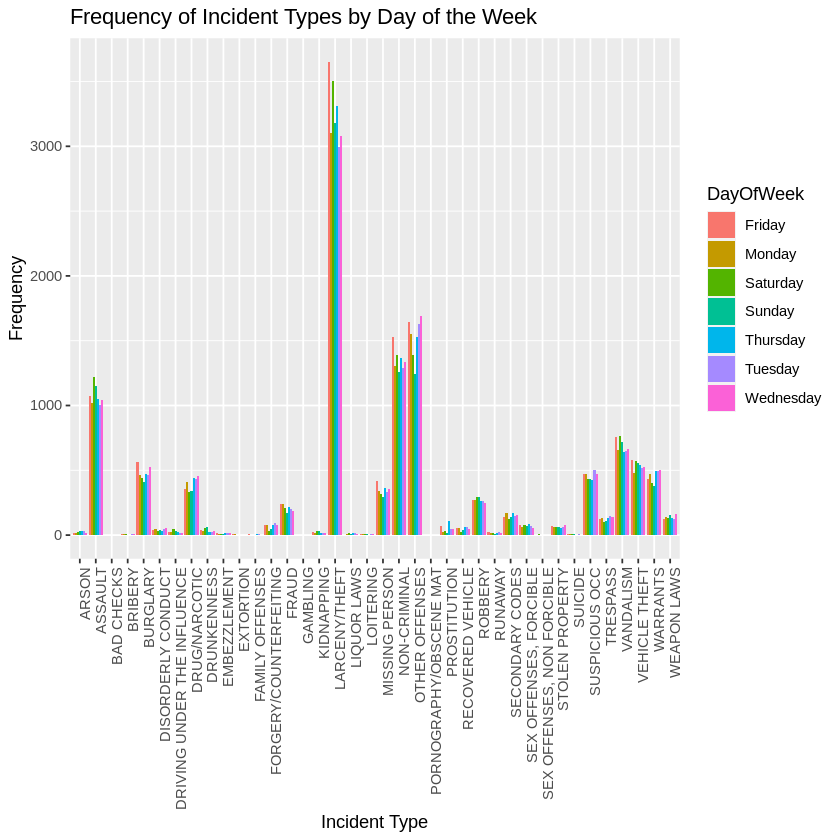

In [9]:
## Frequency of Incidents by Type and Day of the Week:


# Load necessary libraries
library(ggplot2)
library(dplyr)

# Calculate frequency of each category by day of the week
incidents_by_day <- incidents %>%
  group_by(DayOfWeek, Category) %>%
  summarise(Count = n()) %>%
  arrange(DayOfWeek, desc(Count))

# Plotting
ggplot(incidents_by_day, aes(x = Category, y = Count, fill = DayOfWeek)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Frequency of Incident Types by Day of the Week", x = "Incident Type", y = "Frequency")


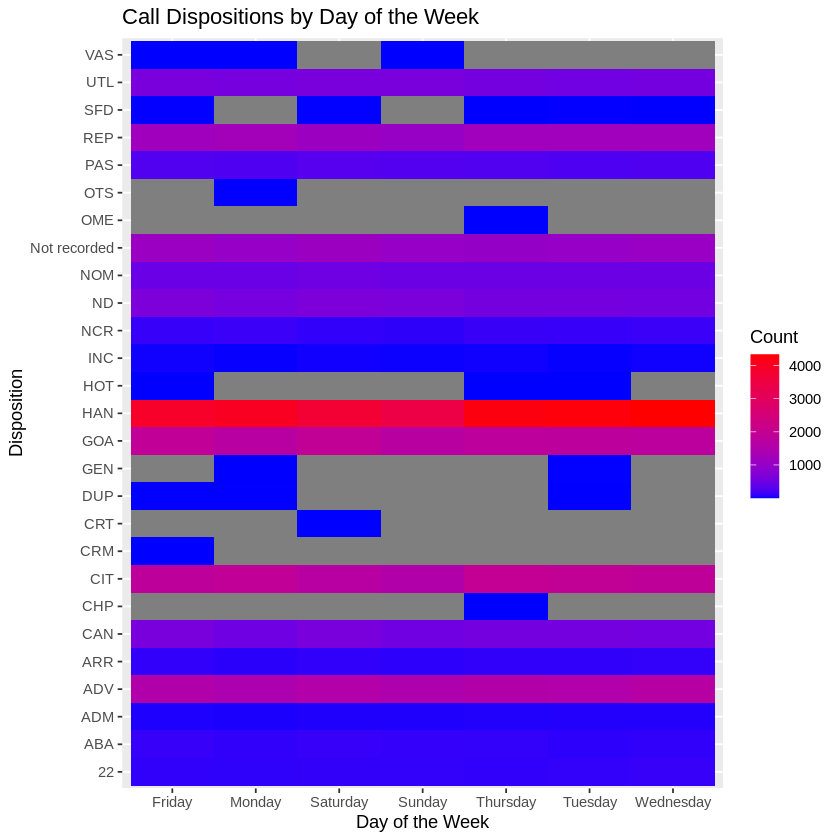

In [25]:
## Analysis of Calls by Disposition and Day of the Week


# Ensure the 'Date' column is in Date format
calls$Date <- as.Date(calls$Date)

# Create 'DayOfWeek' column
calls$DayOfWeek <- weekdays(calls$Date)

# Calculate frequency of dispositions by day of the week
calls_by_day <- calls %>%
  group_by(DayOfWeek, Disposition) %>%
  summarise(Count = n(), .groups = 'drop') %>%
  pivot_wider(names_from = DayOfWeek, values_from = Count)

# Add a total column for sorting if needed
calls_by_day <- calls_by_day %>%
  mutate(Total = rowSums(select(., -Disposition), na.rm = TRUE)) %>%
  arrange(desc(Total))

# Transforming the data for plotting
calls_by_day_long <- calls_by_day %>%
  pivot_longer(cols = -c(Disposition, Total), names_to = "DayOfWeek", values_to = "Count")

# Visualization as a heatmap
ggplot(calls_by_day_long, aes(x = DayOfWeek, y = Disposition, fill = Count)) +
  geom_tile() +
  labs(title = "Call Dispositions by Day of the Week", x = "Day of the Week", y = "Disposition") +
  scale_fill_gradient(low = "blue", high = "red")


4.2. Geographical Distribution of Crimes
- Analysis: Investigate how incidents and calls are distributed by police district and state to identify high-crime areas.


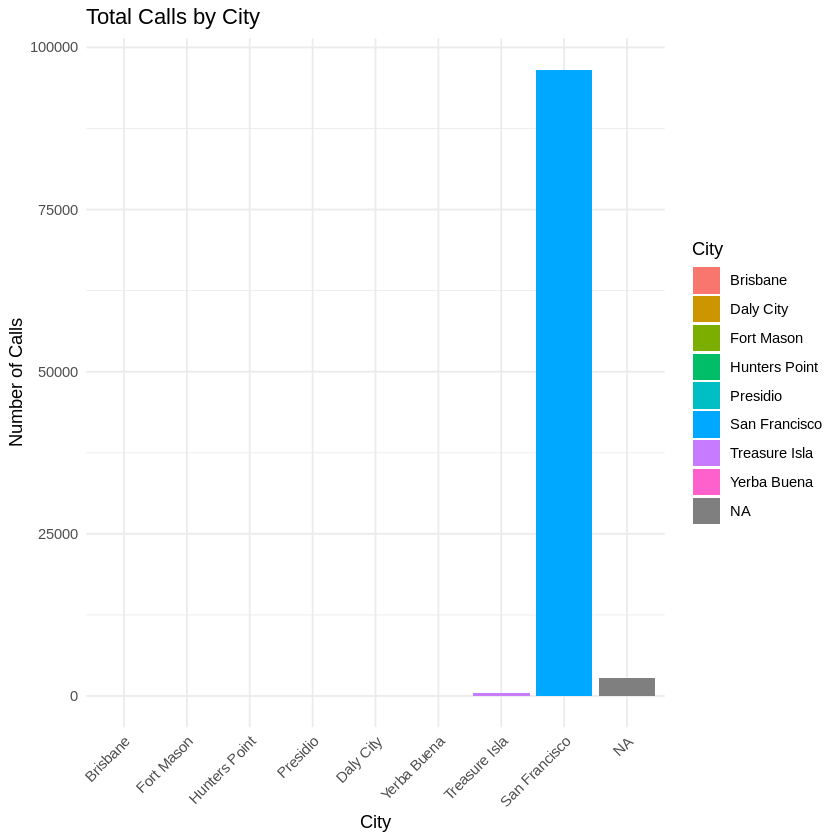

In [11]:
## Distribution by Police District:


# Aggregating data for calls by city
calls_by_city <- calls %>%
  group_by(City) %>%
  summarise(Total_Calls = n(), .groups = 'drop') %>%
  arrange(desc(Total_Calls))

# Visualization of calls by city
ggplot(calls_by_city, aes(x = reorder(City, Total_Calls), y = Total_Calls, fill = City)) +
  geom_col() +
  labs(title = "Total Calls by City", x = "City", y = "Number of Calls") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


4.3. Correlations Between Calls and Incidents
- Analysis: Analyze the relationship between the types of calls received and the incidents reported.


In [16]:
# Aggregate the number of reported incidents by Date
daily_incidents <- incidents %>%
    count(Date, sort = TRUE) %>%
    rename(n_incidents = n)

# Aggregate the number of calls for police service by Date
daily_calls <- calls %>%
    count(Date, sort = TRUE) %>%
    rename(n_calls = n)

In [15]:
# Join data frames to create a new "mutated" set of information
shared_dates <- daily_calls%>%
                inner_join(daily_incidents, by="Date")

# Take a glimpse of this new data frame
glimpse(shared_dates)


Rows: 776
Columns: 3
$ Date        <date> 2016-09-21, 2017-09-14, 2017-06-01, 2016-06-24, 2016-06-2…
$ n_calls     <int> 165, 165, 162, 161, 160, 160, 159, 158, 158, 157, 156, 155…
$ n_incidents <int> 60, 97, 100, 105, 100, 89, 109, 97, 93, 72, 73, 68, 80, 77…


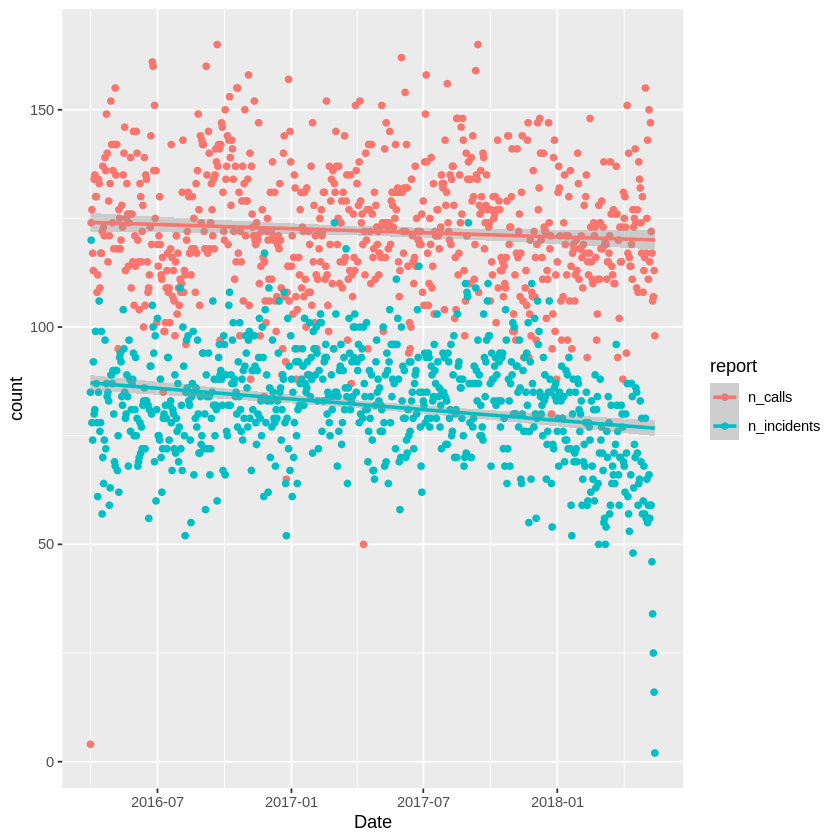

In [17]:
# Gather into long format using the "Date" column to define observations
plot_shared_dates <- shared_dates %>%
  gather(key = report, value = count, -Date)

# Plot points and regression trend lines
ggplot(plot_shared_dates, aes(x = Date, y = count, color = report)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ x)

In [18]:
# Calculate correlation coefficient between daily frequencies
daily_cor <- cor(shared_dates$n_calls, shared_dates$n_incidents)
sprintf('Correlation coefficient between daily frequencies: %f', daily_cor)

# Summarize frequencies by month
correlation_df <-shared_dates %>%
  mutate(month = month(Date)) %>%
  group_by(month) %>%
  summarise(n_incidents = sum(n_incidents),
            n_calls = sum(n_calls))

# Calculate correlation coefficient between monthly frequencies
monthly_cor <- cor(correlation_df$n_incidents, correlation_df$n_calls)
sprintf('Correlation coefficient between monthly frequencies: %f', monthly_cor)


[1] "Correlation coefficient between daily frequencies: 0.146969"

[1] "Correlation coefficient between monthly frequencies: 0.970683"

In [19]:
# Subset calls to police by shared_dates
calls_shared_dates <- semi_join(calls, shared_dates, by = c("Date" = "Date"))
glimpse(calls_shared_dates)

# Perform a sanity check that we are using this filtering join function appropriately
identical(sort(unique(shared_dates$Date)), sort(unique(calls_shared_dates$Date)))

# Filter recorded incidents by shared_dates
incidents_shared_dates <- filter(incidents, Date %in% shared_dates$Date)
glimpse(incidents_shared_dates)

Rows: 94,720
Columns: 14
$ `Crime Id`        <dbl> 163003307, 180870423, 173510362, 163272811, 17281100…
$ Descript          <chr> "Bicyclist", "586", "Suspicious Person", "911 Drop",…
$ `Report Date`     <dttm> 2016-10-26, 2018-03-28, 2017-12-17, 2016-11-22, 201…
$ Date              <date> 2016-10-26, 2018-03-28, 2017-12-17, 2016-11-22, 201…
$ `Offense Date`    <dttm> 2016-10-26, 2018-03-28, 2017-12-17, 2016-11-22, 201…
$ `Call Time`       <time> 17:47:00, 05:49:00, 03:00:00, 17:39:00, 08:54:00, 1…
$ `Call Date Time`  <dttm> 2016-10-26 17:47:00, 2018-03-28 05:49:00, 2017-12-1…
$ Disposition       <fct> GOA, HAN, ADV, NOM, GOA, REP, GOA, REP, HAN, GOA, AD…
$ Address           <chr> "The Embarcadero Nor/kearny St", "Ingalls St/van Dyk…
$ City              <chr> "San Francisco", "San Francisco", "San Francisco", "…
$ State             <chr> "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA"…
$ `Agency Id`       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ `Address Type

[1] TRUE

Rows: 63,587
Columns: 13
$ IncidntNum <dbl> 176122807, 160569314, 160362475, 160435298, 180018692, 1760…
$ Category   <fct> "LARCENY/THEFT", "ASSAULT", "ROBBERY", "KIDNAPPING", "VEHIC…
$ Descript   <chr> "GRAND THEFT FROM UNLOCKED AUTO", "BATTERY", "ROBBERY, BODI…
$ DayOfWeek  <chr> "Saturday", "Thursday", "Tuesday", "Friday", "Sunday", "Wed…
$ Date       <date> 2017-05-13, 2016-07-14, 2016-05-03, 2016-05-27, 2018-01-07…
$ Time       <time> 10:20:00, 16:00:00, 14:19:00, 23:57:00, 18:00:00, 20:00:00…
$ PdDistrict <chr> "SOUTHERN", "MISSION", "NORTHERN", "SOUTHERN", "CENTRAL", "…
$ Resolution <chr> "NONE", "NONE", "ARREST, BOOKED", "ARREST, BOOKED", "NONE",…
$ Address    <chr> "800 Block of BRYANT ST", "MISSION ST / CESAR CHAVEZ ST", "…
$ X          <dbl> -122.4034, -122.4182, -122.4299, -122.4050, -122.4171, -122…
$ Y          <dbl> 37.77542, 37.74817, 37.77744, 37.78512, 37.80614, 37.78515,…
$ Location   <chr> "{'latitude': '37.775420706711', 'human_address': '{\"addre…
$ PdId       <d

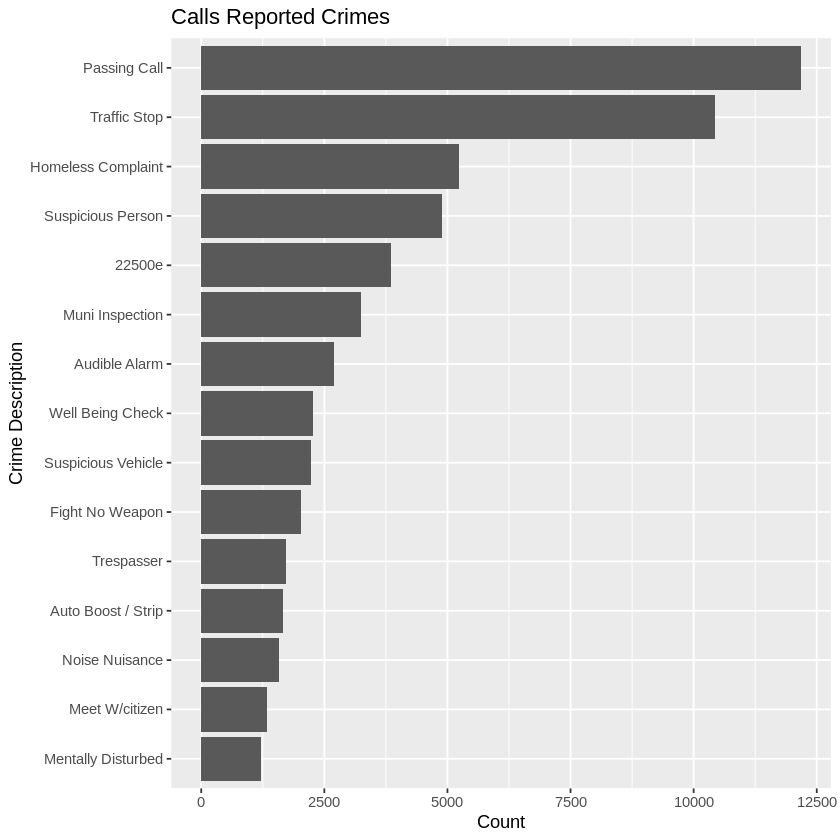

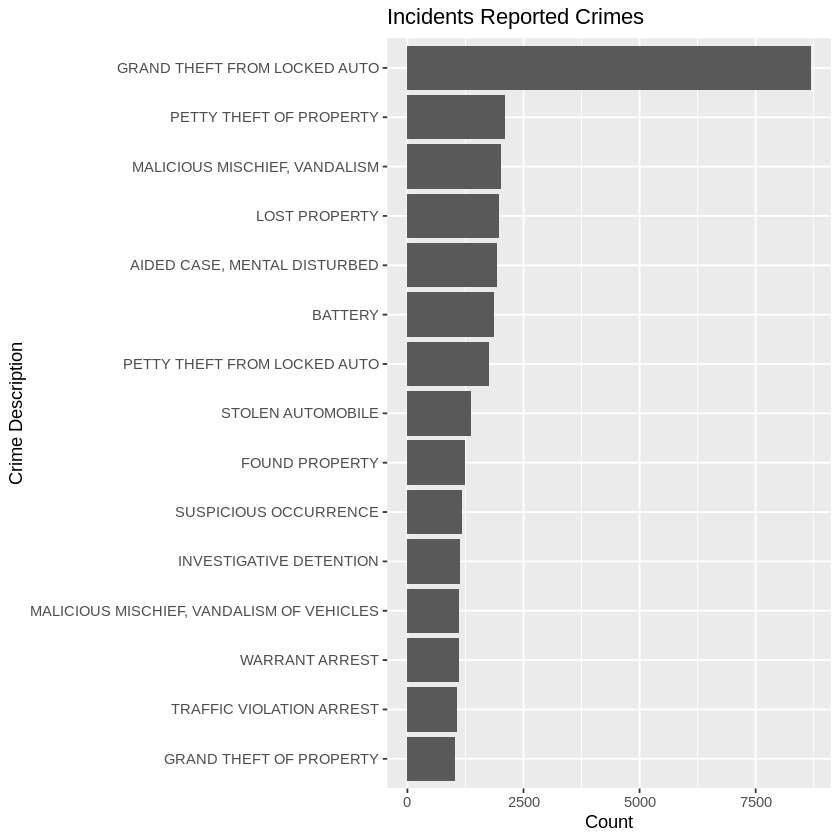

In [20]:
# Create a bar chart of the number of calls for each crime
plot_calls_freq <- calls_shared_dates %>%
  count(Descript) %>%
  top_n(15, n) %>%
  ggplot(aes(x = reorder(Descript, n), y = n)) +
  geom_bar(stat = "identity") +
  ylab("Count") +
  xlab("Crime Description") +
  ggtitle("Calls Reported Crimes") +
  coord_flip()


# Create a bar chart of the number of reported incidents for each crime
plot_incidents_freq <- incidents_shared_dates %>%
  count(Descript) %>%
  top_n(15, n)  %>%
  ggplot(aes(x = reorder(Descript, n), y = n)) +
  geom_bar(stat = 'identity') +
  ylab("Count") +
  xlab("Crime Description") +
  ggtitle("Incidents Reported Crimes") +
  coord_flip()

# Output the plots
plot_calls_freq
plot_incidents_freq

In [21]:
# Arrange the top 10 locations of called in crimes in a new variable
location_calls <- calls_shared_dates %>%
  filter(Descript == "Auto Boost / Strip")%>%
  count(Address) %>%
  arrange(desc(n))%>%
  top_n(10, n)

location_calls <- calls_shared_dates %>%
  filter(Descript == "Auto Boost / Strip")%>%
  count(Address) %>%
  arrange(desc(n))%>%
  top_n(10, n)

# Arrange the top 10 locations of reported incidents in a new variable
location_incidents <- incidents_shared_dates %>%
  filter(Descript == "GRAND THEFT FROM LOCKED AUTO") %>%
  count(Address) %>%
  arrange(desc(n))%>%
  top_n(10, n)

# Print the top locations of each dataset for comparison
location_calls
location_incidents

Address,n
<chr>,<int>
1100 Block Of Point Lobos Av,21
3600 Block Of Lyon St,20
100 Block Of Christmas Tree Point Rd,18
1300 Block Of Webster St,12
500 Block Of 6th Av,12
800 Block Of Vallejo St,10
1000 Block Of Great Hy,9
100 Block Of Hagiwara Tea Garden Dr,7
1100 Block Of Fillmore St,7


Address,n
<chr>,<int>
800 Block of BRYANT ST,441
500 Block of JOHNFKENNEDY DR,89
1000 Block of POINTLOBOS AV,84
800 Block of MISSION ST,61
2600 Block of GEARY BL,38
3600 Block of LYON ST,36
1300 Block of WEBSTER ST,35
1100 Block of FILLMORE ST,34
22ND ST / ILLINOIS ST,33


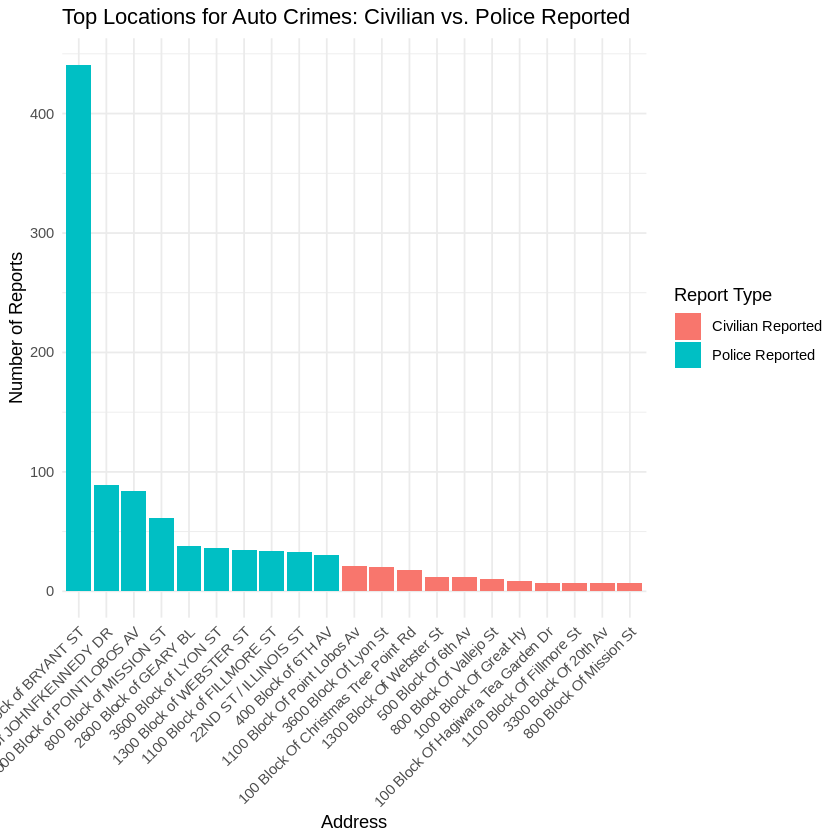

In [22]:
library(ggplot2)
library(dplyr)

# Assuming location_calls and location_incidents are already created and contain the top 10 locations

# Combine the datasets for a unified plot
combined_data <- bind_rows(
  mutate(location_calls, Type = "Civilian Reported"),
  mutate(location_incidents, Type = "Police Reported")
)

# Create a grouped bar chart
ggplot(combined_data, aes(x = reorder(Address, -n), y = n, fill = Type)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(title = "Top Locations for Auto Crimes: Civilian vs. Police Reported",
       x = "Address", y = "Number of Reports",
       fill = "Report Type") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


4.4. Incident Resolutions Analysis
- Analysis: Review the outcomes of incidents to assess the efficiency of resolutions and identify patterns.


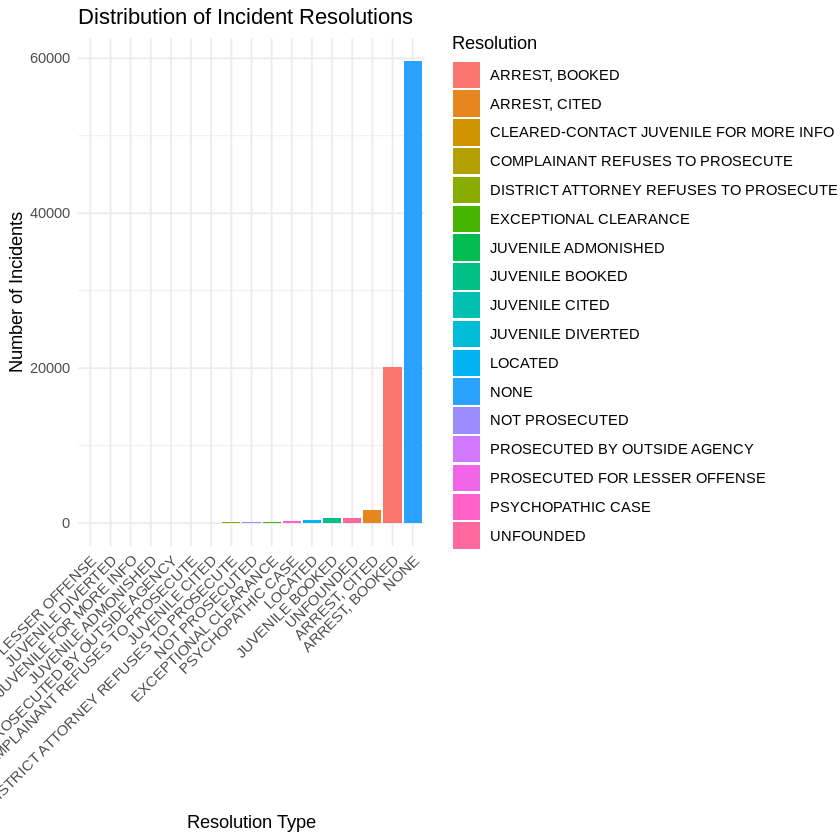

In [23]:
# Aggregating data by resolution type
resolution_counts <- incidents %>%
  group_by(Resolution) %>%
  summarise(Total_Incidents = n(), .groups = 'drop') %>%
  arrange(desc(Total_Incidents))

# Visualization of resolution types
ggplot(resolution_counts, aes(x = reorder(Resolution, Total_Incidents), y = Total_Incidents, fill = Resolution)) +
  geom_col() +
  labs(title = "Distribution of Incident Resolutions", x = "Resolution Type", y = "Number of Incidents") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

